In [1]:
#1 데이터 시각화

import seaborn as sns

# seaborn 에서 제공하는 데이터셋 획득
anscombe= sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


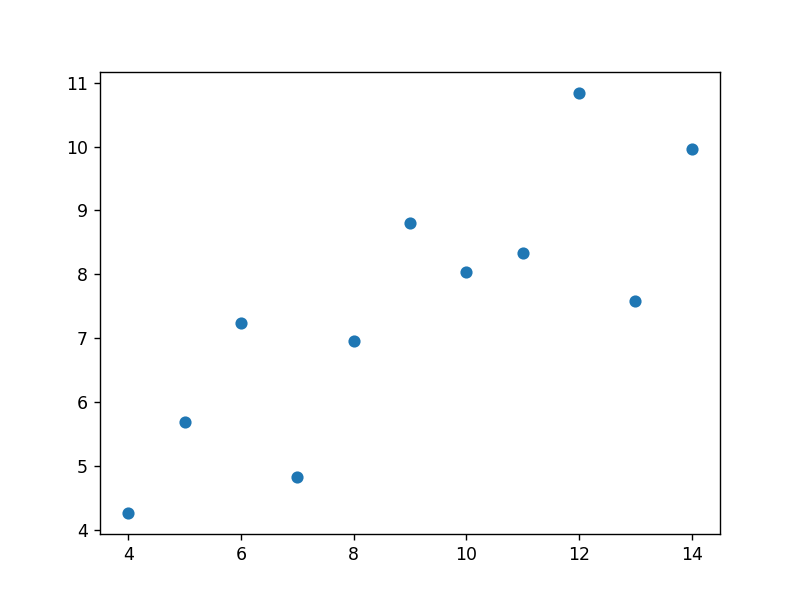

In [8]:
# dataset 열에서 값이 I인 것만을 추출
dataset_1 = anscombe[anscombe['dataset'] == 'I']

# 선 그래프
#plt.plot(dataset_1['x'], dataset_1['y'])

# 점 그래프
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

<IPython.core.display.Javascript object>


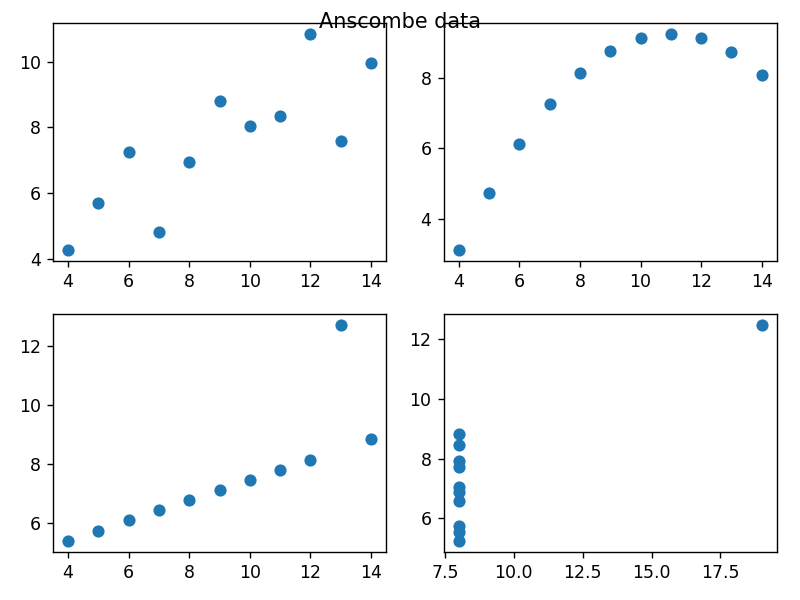

In [15]:
# dataset 열의 값이 II, III, IV 인 것들을 각각 추출
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure()
# 그래프 격자 그리기. (행, 열, 위치)
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# 각각의 그래프에 데이터셋 지정
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 제목 추가
fig.suptitle("Anscombe data")

# 각 그래프의 레리아웃 조절
fig.tight_layout()

In [14]:
#2 matplotlib 사용

tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<IPython.core.display.Javascript object>


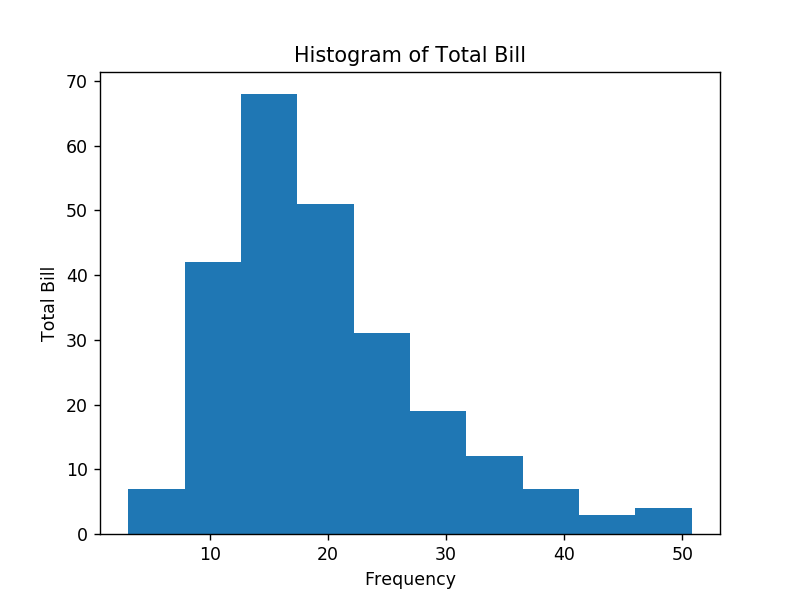

Text(0,0.5,'Total Bill')

In [17]:
# 히스토그램 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

# bins는 x축 간격
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


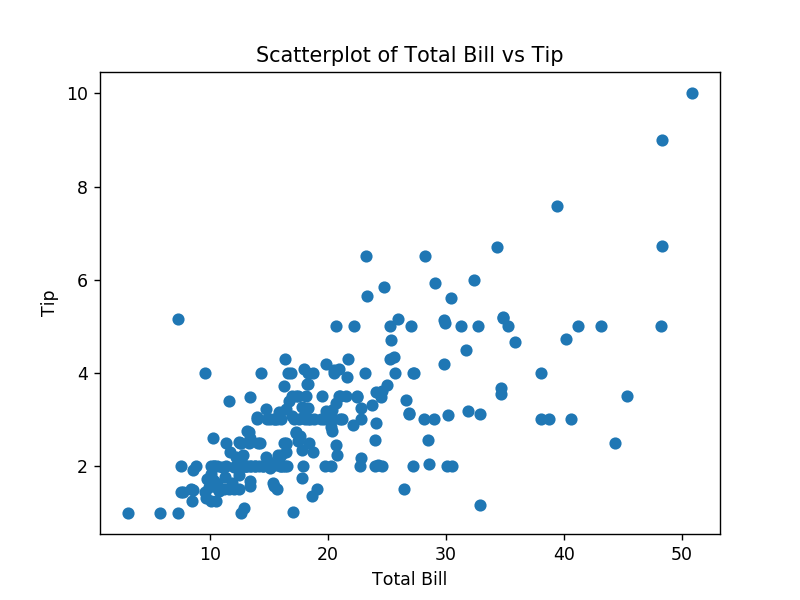

Text(0,0.5,'Tip')

In [18]:
# 산점도 그래프
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


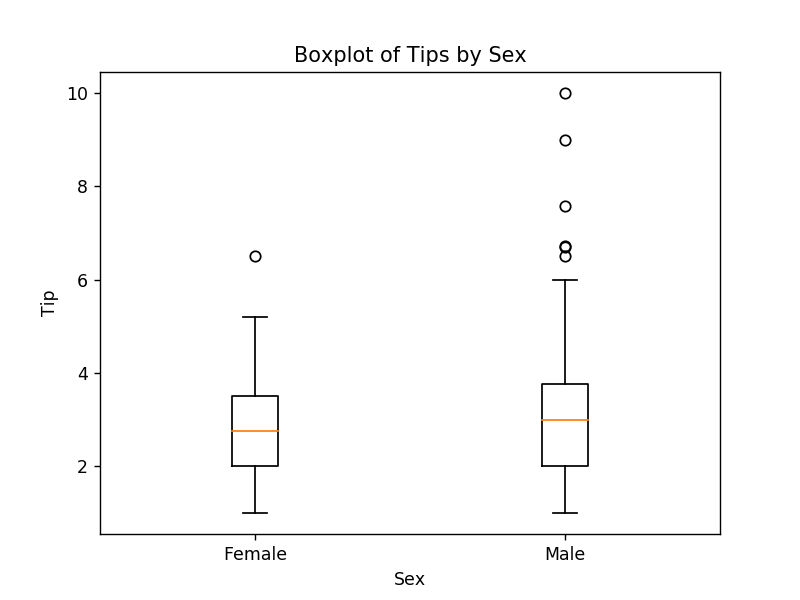

Text(0.5,1,'Boxplot of Tips by Sex')

In [20]:
# 박스 그래프
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([
    tips[tips['sex'] == 'Female']['tip'],
    tips[tips['sex'] == 'Male']['tip']],
    labels=['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

<IPython.core.display.Javascript object>


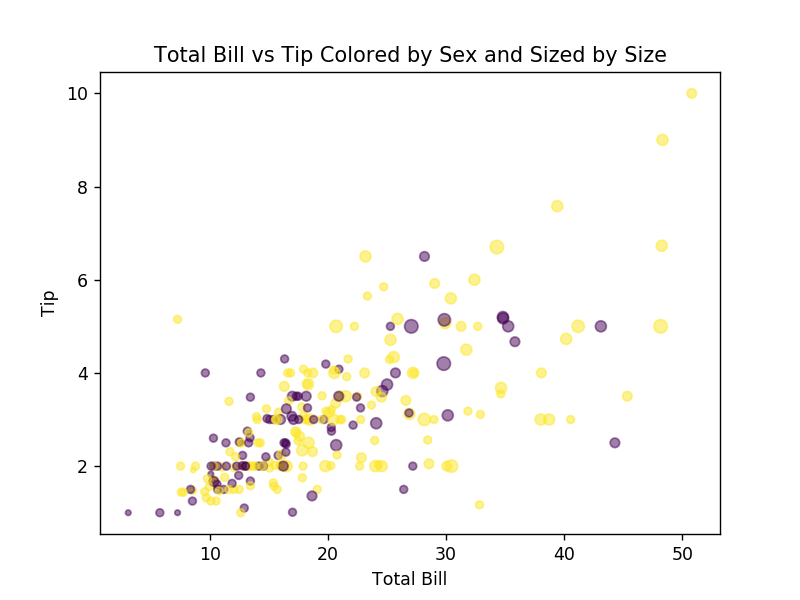

Text(0,0.5,'Tip')

In [22]:
# 다변량 그래프 그리기

# 새로운 sex_color 열을 recode_sex 함수를 사용하여 값을 할당하고 추가한다.
def recode_sex(sex) :
    if sex == 'Female' :
        return 0
    else :
        return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<IPython.core.display.Javascript object>


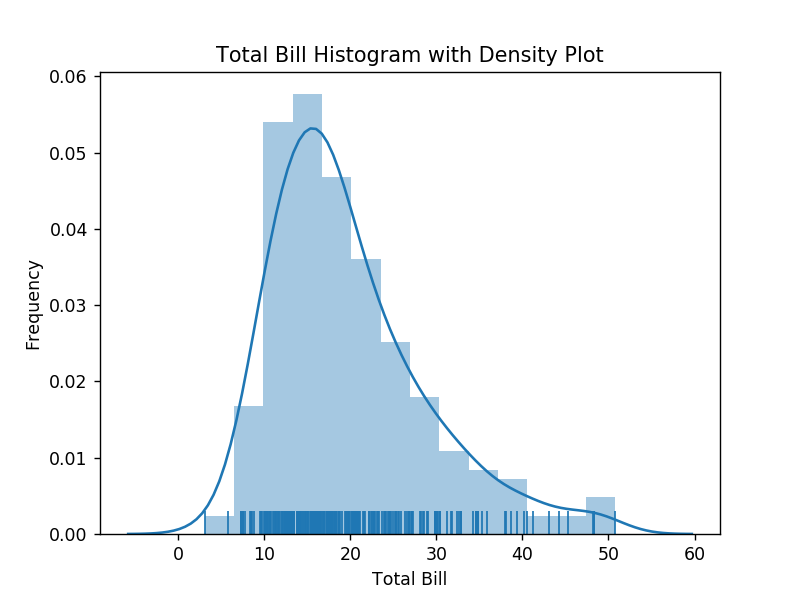

Text(0,0.5,'Frequency')

In [26]:
#3 seaborn 라이브러리 자유자재로 사용하기
# matplot이 아닌 seaborn 라이브러리로 그래프를 그려본다.

tips = sns.load_dataset('tips')

ax = plt.subplots()
# 밀집도 그래프를 제외하고 싶다면 kde 파라미터에 False를 주자. 디폴트는 True
#ax = sns.distplot(tips['total_bill'], kde=False)

# 히스토그램을 제외하고 싶다면 hist에 False를 주자.
#ax = sns.distplot(tips['total_bill'], hist=False)

# 양탄자 그래프를 추가하려면 rug 인자를 추가하자.
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


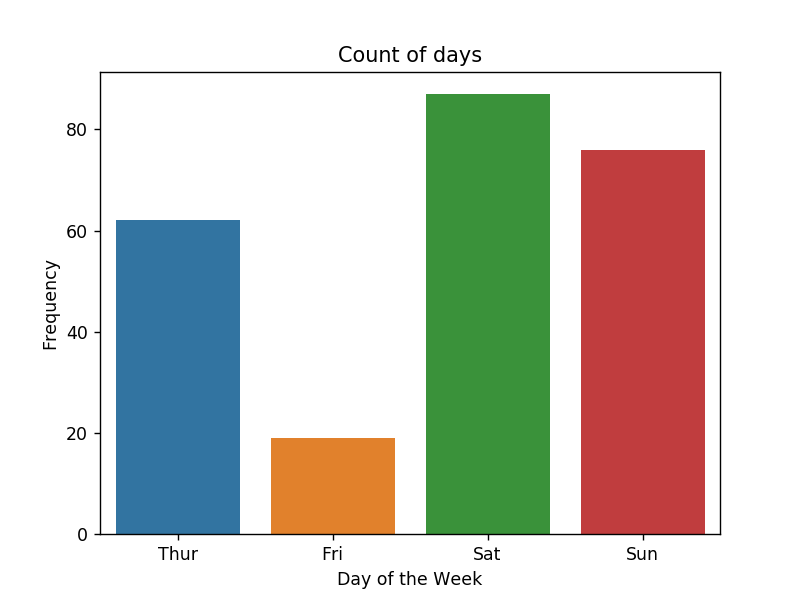

Text(0,0.5,'Frequency')

In [27]:
# 히스토그램과 비슷한 Count 그래프. 이산값을 나타낸다.
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

<IPython.core.display.Javascript object>


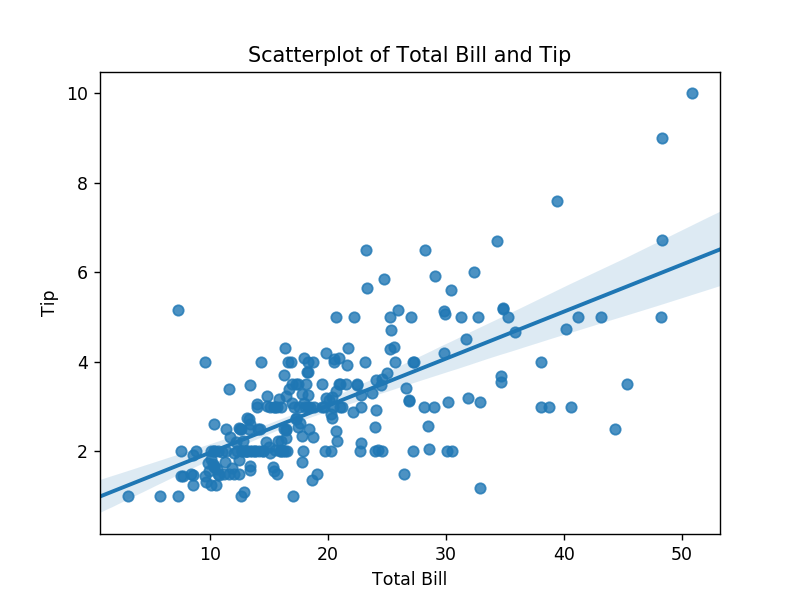

<IPython.core.display.Javascript object>


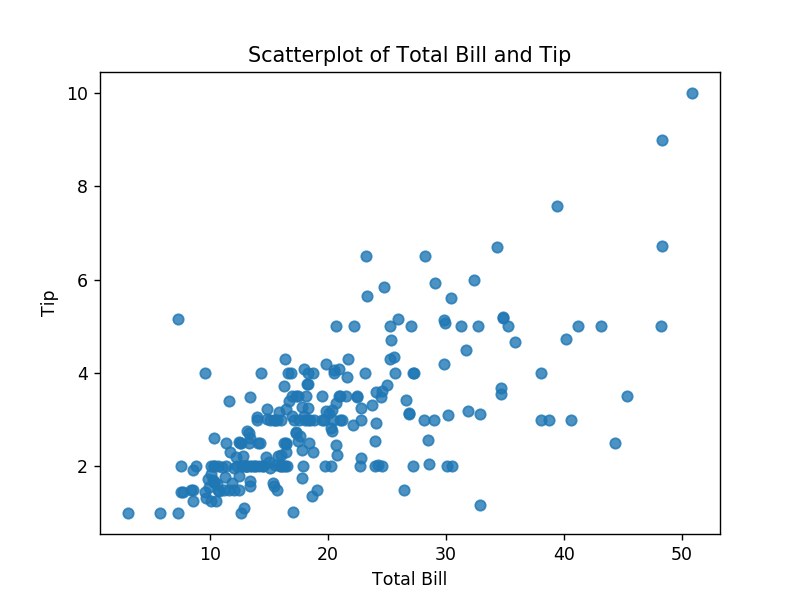

Text(0,0.5,'Tip')

In [43]:
# seaborn 으로 산점도 그래프 그래기
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

# 회귀선을 제거하고 싶다면 fit_reg 인자에 False를 준다.
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')



<IPython.core.display.Javascript object>


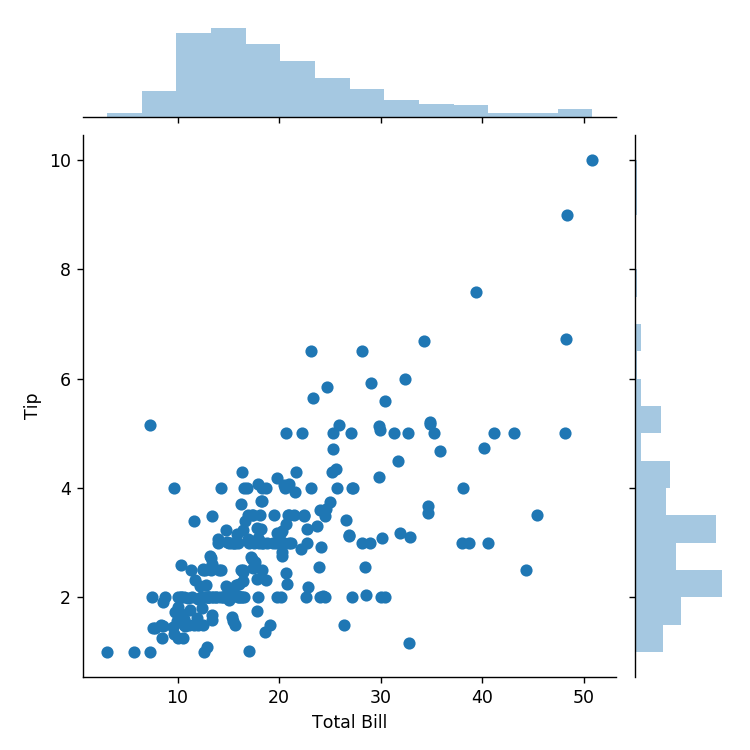

<IPython.core.display.Javascript object>


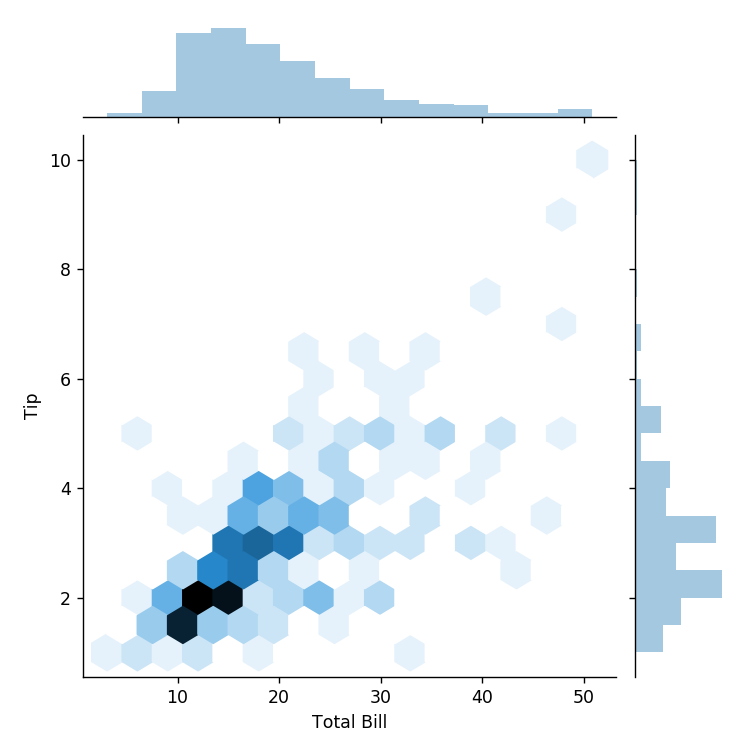

Text(0.5,1.03,'Joint Plot of Total Bill and Tip')

In [32]:
# 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot 메서드
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

# 산점도 그래프를 구분하기 쉽게 육각 그래프를 사용할 수 있다.
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>


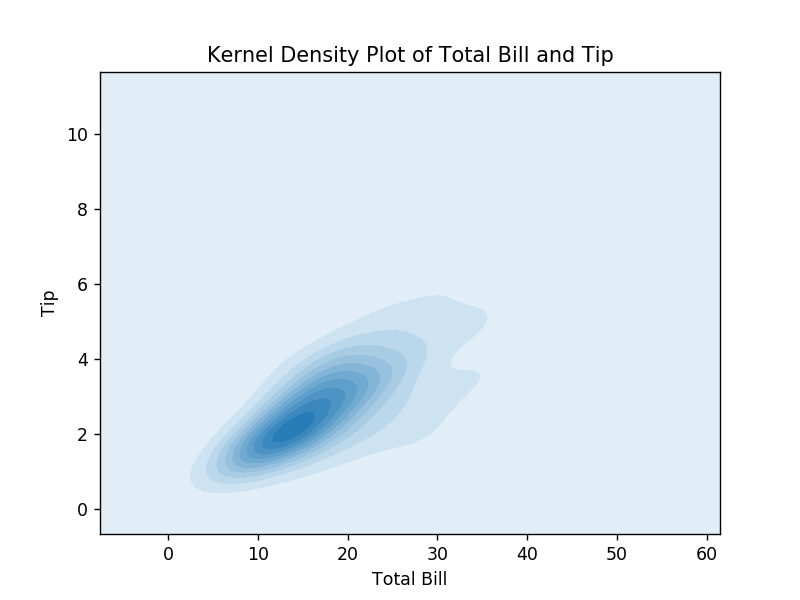

Text(0,0.5,'Tip')

In [33]:
# 2차원 밀집도 그리기
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

<IPython.core.display.Javascript object>


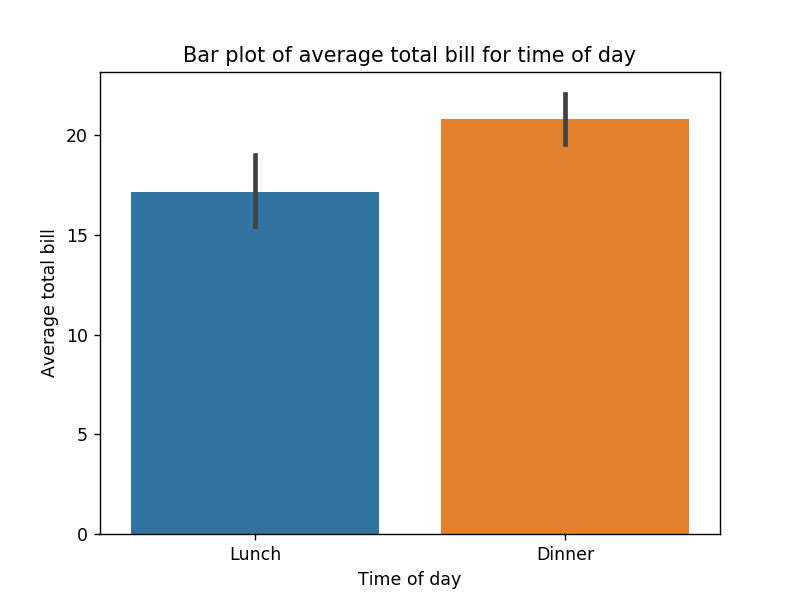

Text(0,0.5,'Average total bill')

In [34]:
# 바 그래프 그리기
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

<IPython.core.display.Javascript object>


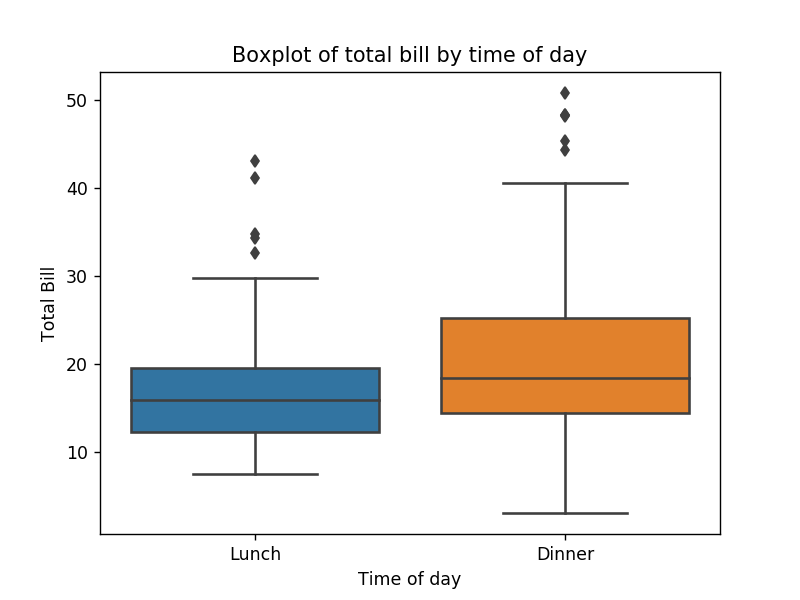

Text(0,0.5,'Total Bill')

In [37]:
# 박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


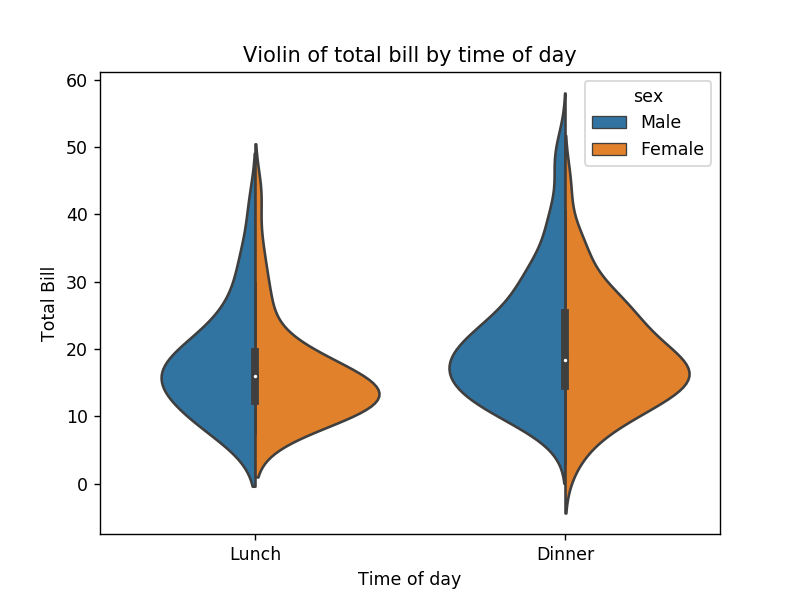

Text(0,0.5,'Total Bill')

In [41]:
# 박스 그래프는 데이터 분산이 모호하게 표현됨.
# 커널 밀도를 추가한 바이올린 그래프를 사용하면 된다.
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)
ax.set_title('Violin of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

<IPython.core.display.Javascript object>


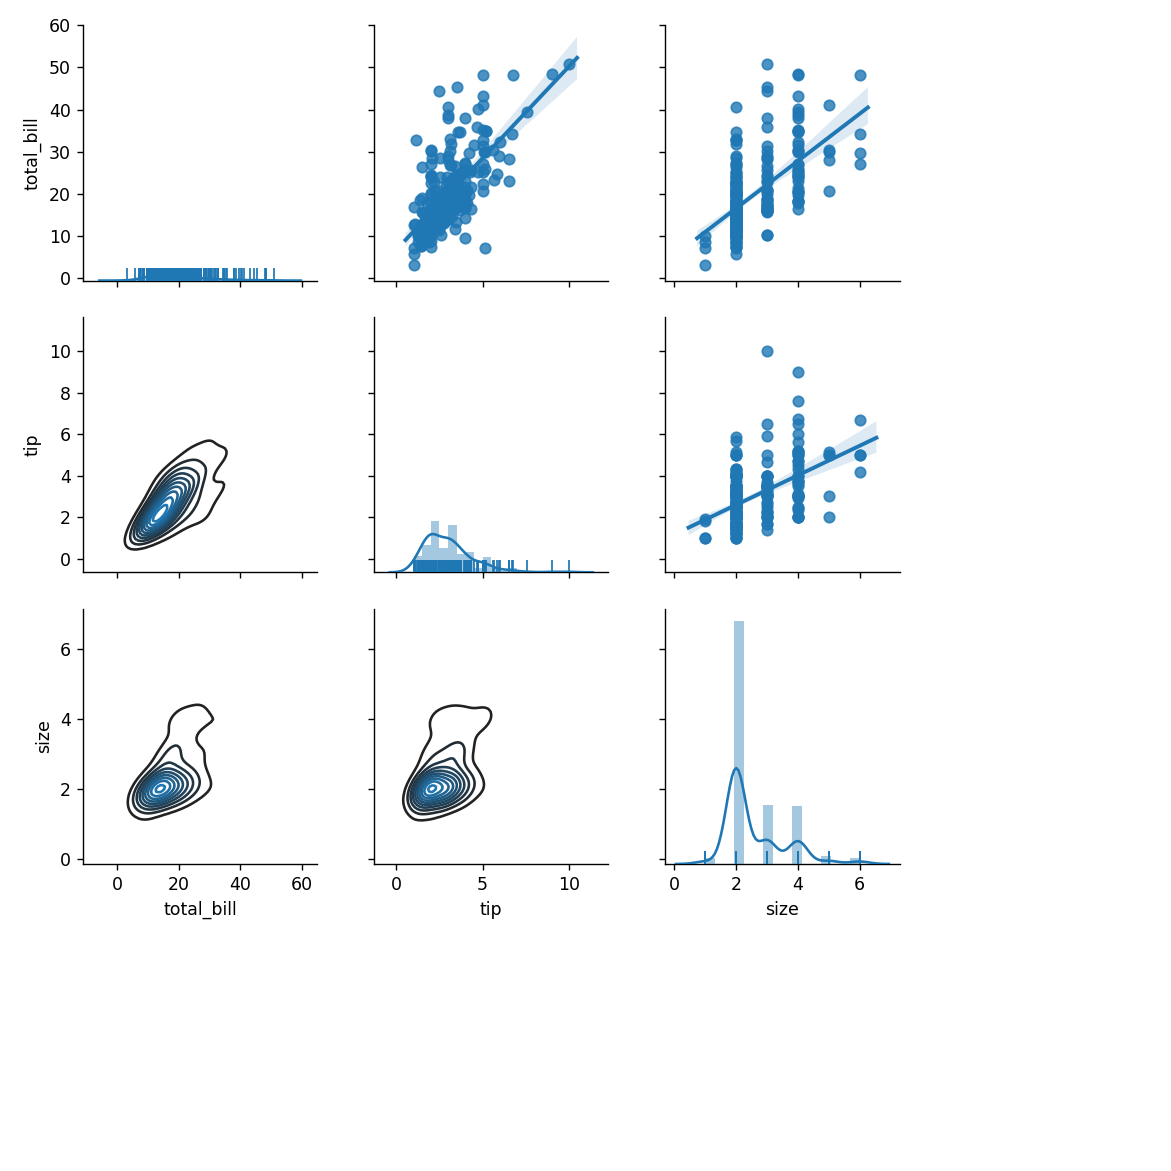

In [40]:
# 관계 그래프 그리기
# 지금까지 설명한 그래프를 종합한 그래프.
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

<IPython.core.display.Javascript object>


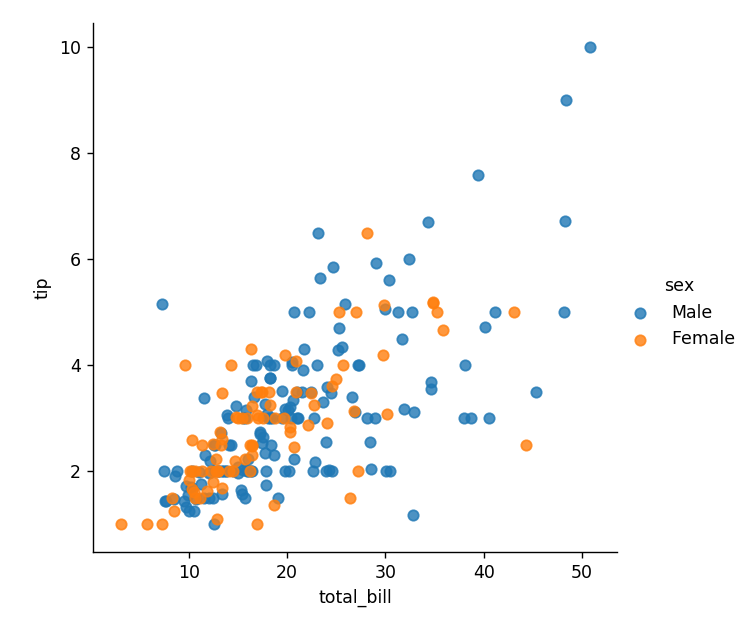

<IPython.core.display.Javascript object>


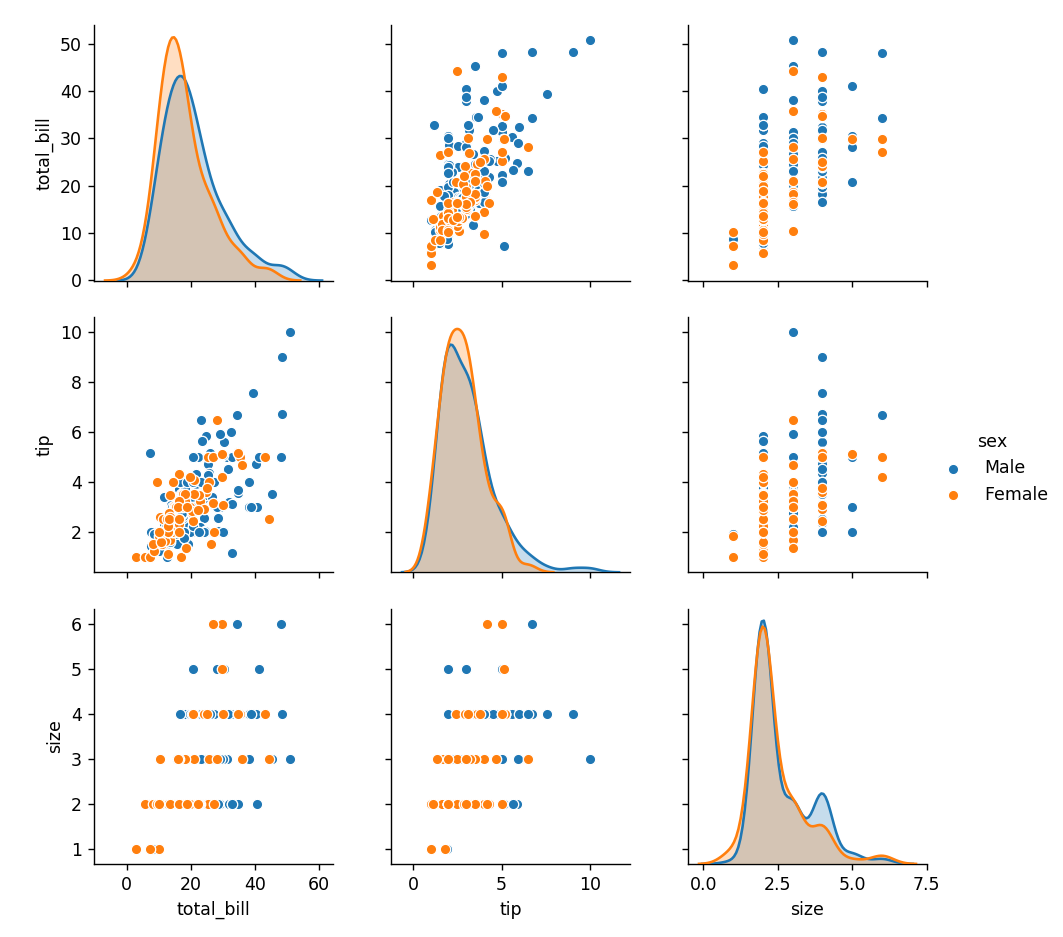

In [45]:
# 그래프에 색 추가 방법
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)
fig = sns.pairplot(tips, hue='sex')

<IPython.core.display.Javascript object>


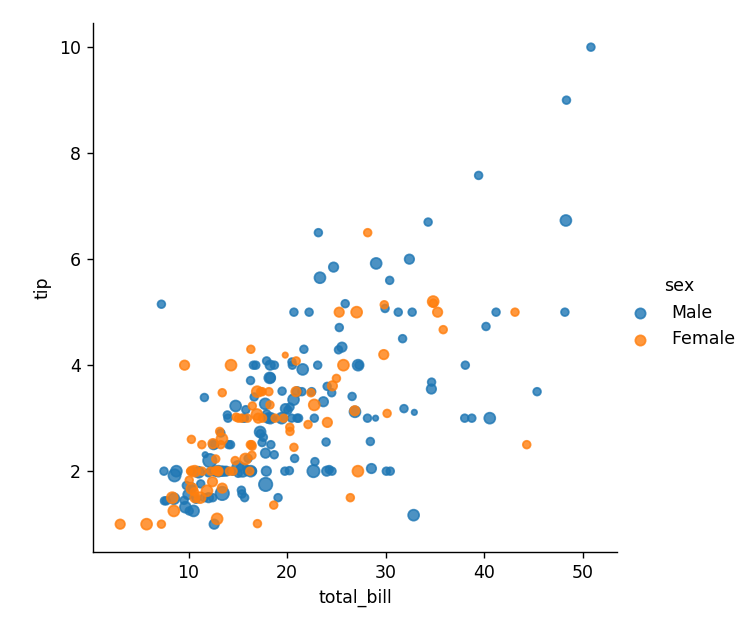

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


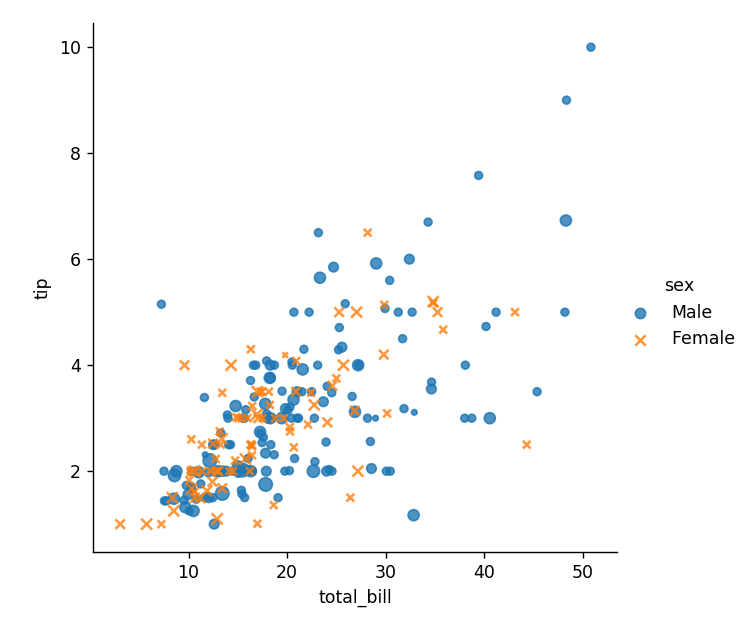

In [47]:
# 산점도 그래프의 점 크기 조절
scatter = sns.lmplot(x='total_bill', 
                     y='tip', 
                     data=tips, 
                     hue='sex', 
                     fit_reg=False,
                    scatter_kws={'s': tips['size']*10})

# 산점도 그래프의 점의 기호 변경
scatter = sns.lmplot(x='total_bill', 
                     y='tip', 
                     data=tips, 
                     hue='sex', 
                     fit_reg=False,
                    scatter_kws={'s': tips['size']*10},
                    markers=['o', 'x'])


<IPython.core.display.Javascript object>


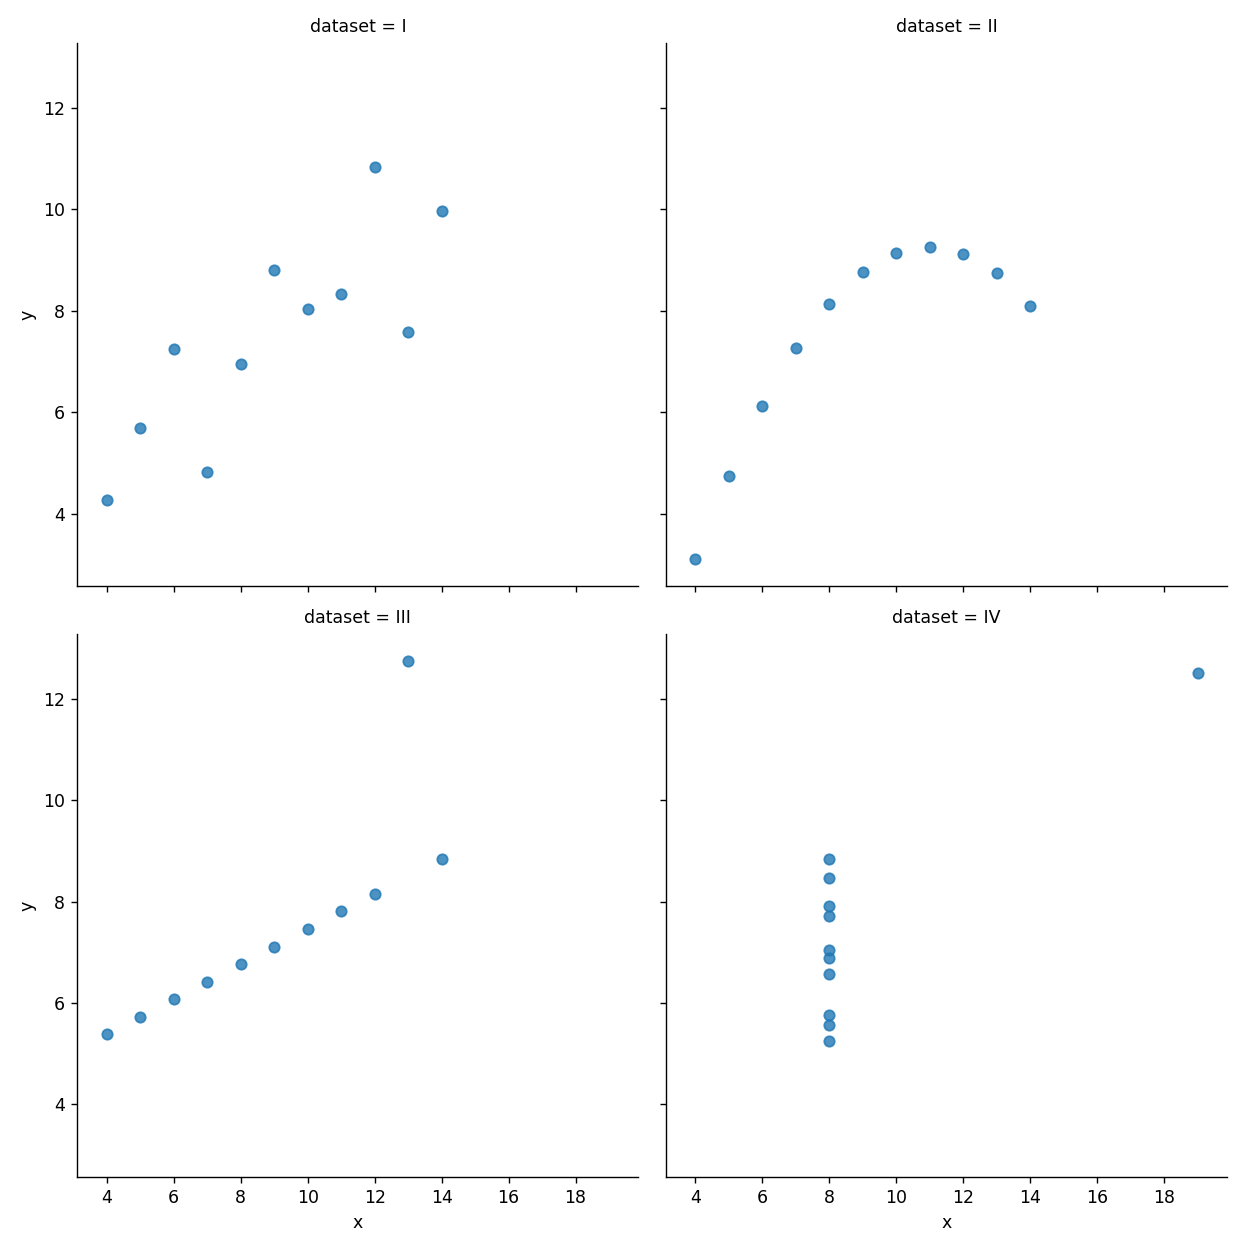

In [49]:
# 그룹별로 데이터 나누기
anscombe_plot = sns.lmplot(x='x', 
                           y='y', 
                           data=anscombe, 
                           fit_reg=False,
                           col='dataset', 
                           col_wrap=2)

<IPython.core.display.Javascript object>


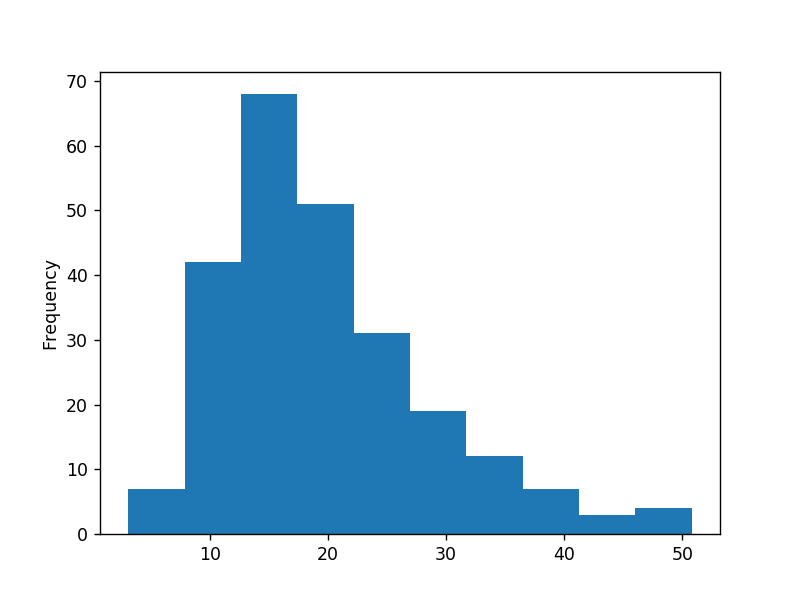

In [50]:
#4 데이터 프레임과 시리즈로 그래프 그리기
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

<IPython.core.display.Javascript object>


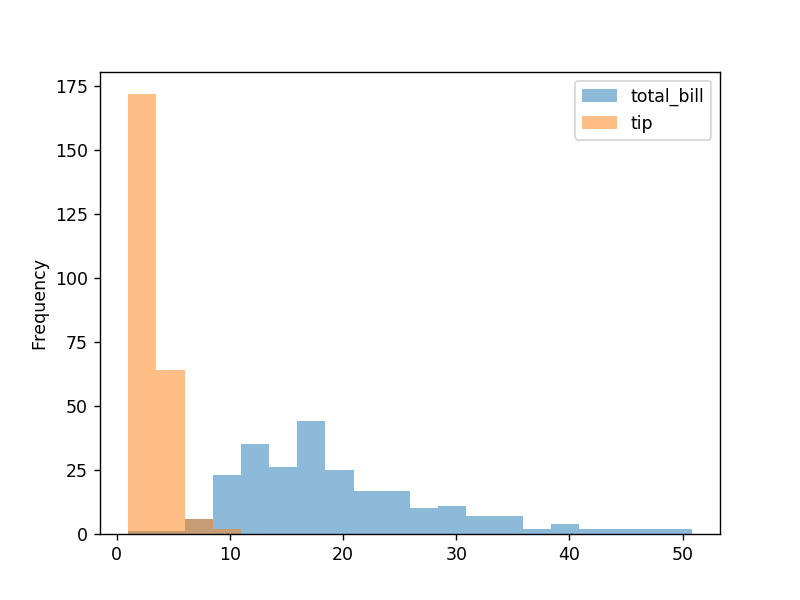

In [54]:
# tips 데이터 프레임에서 2개의 시리즈를 선택하여 히스토그램 그리기
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

<IPython.core.display.Javascript object>


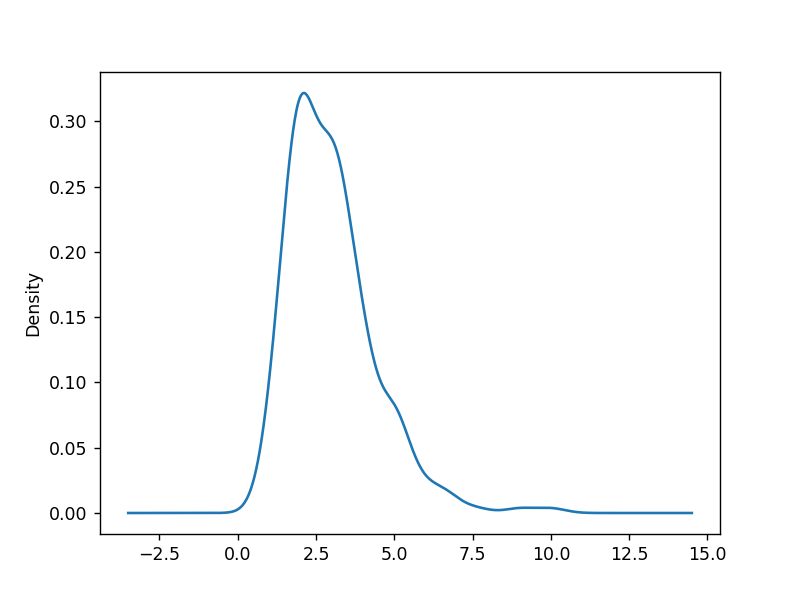

<IPython.core.display.Javascript object>


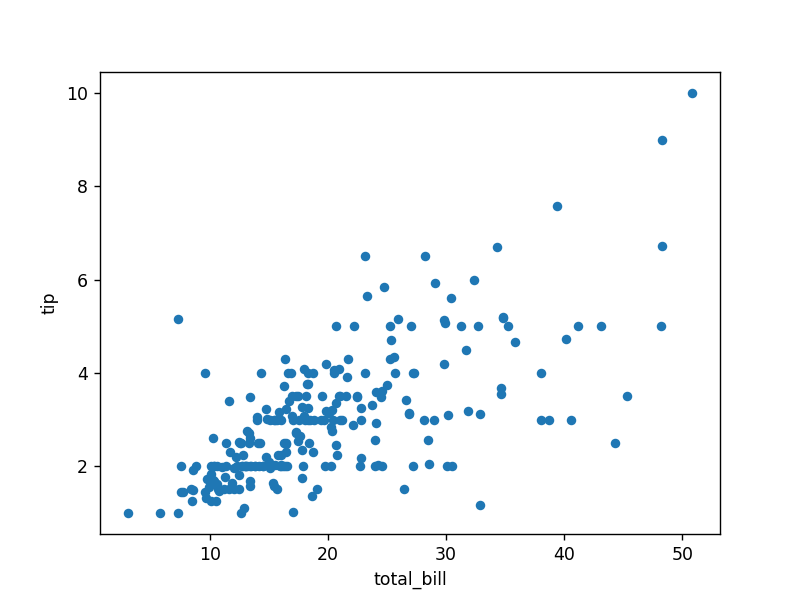

<IPython.core.display.Javascript object>


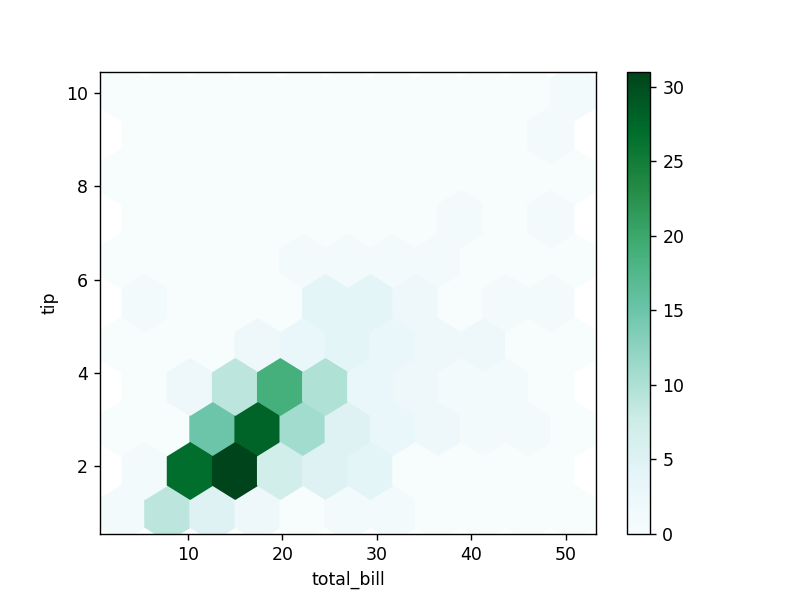

<IPython.core.display.Javascript object>


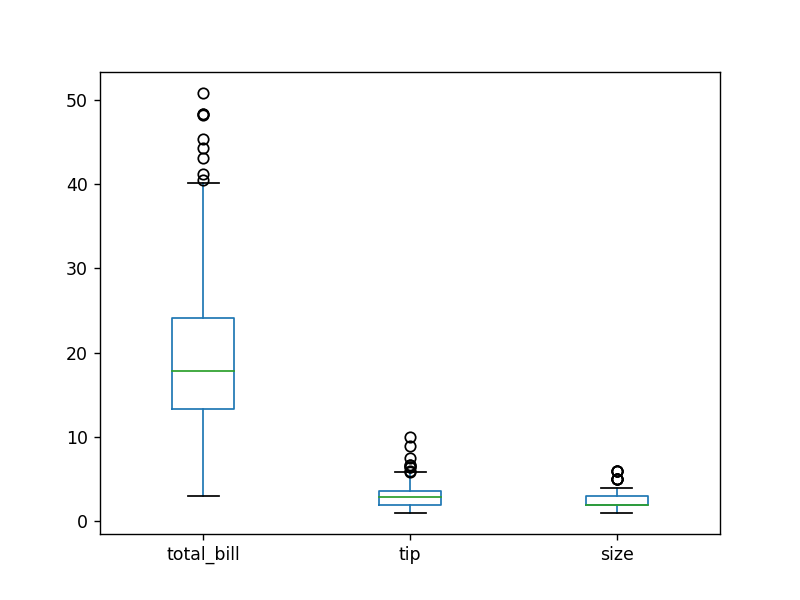

In [60]:
# 밀집도, 산점도, 육각 그래프, 박스그래프
# 각각 kde, scatter, hexbin, box 메서드 사용

ax = plt.subplots()
ax = tips['tip'].plot.kde()

fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

<IPython.core.display.Javascript object>


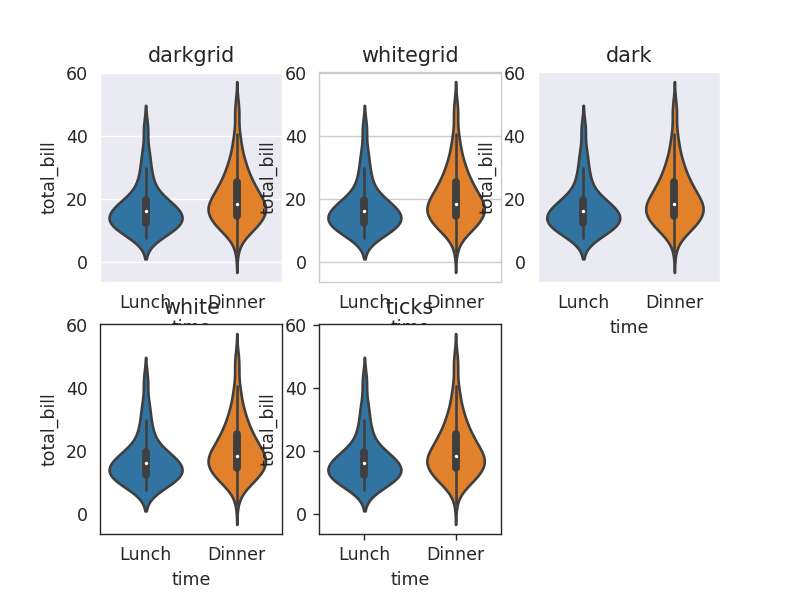

In [64]:
#5 그래프에 스타일 설정
fig = plt.figure()
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for i, style in enumerate(styles) :
    plot_position = i+1
    
    with sns.axes_style(style) :
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
        